In [47]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader

In [48]:
GoogleDriveDownloader.download_file_from_google_drive(file_id='1tU_MRukrg3D2iZFZ-tk4oj6MfV4o7q4u',
                                                      dest_path='./rilevazioni.csv', overwrite=True)

In [0]:
import os
import requests
import pandas as pd
import random
import numpy as np

In [50]:
rilevazioni = pd.read_csv('rilevazioni.csv').set_index(['Regione','Citta'])
rilevazioni.iloc[:,-10:]

18-04  19-04  20-04  ...  25-04  26-04  27-04
Regione   Citta                                 ...                     
LOMBARDIA BERGAMO          10629  10689  10738  ...  11047  11113  11150
          BRESCIA          11758  11946  12004  ...  12540  12564  12599
          COMO              2439   2488   2550  ...   2942   3025   3076
          CREMONA           5407   5417   5491  ...   5906   5966   5971
          LECCO             2030   2072   2080  ...   2157   2177   2230
...                          ...    ...    ...  ...    ...    ...    ...
CALABRIA  COSENZA            385    407    408  ...    447    447    449
          REGGIO CALABRIA    240    241    243  ...    249    249    250
          CATANZARO          197    197    197  ...    201    202    205
          VIBO VALENTIA       70     71     71  ...     72     72     73
          CROTONE            117    117    117  ...    117    117    117

[108 rows x 10 columns]

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

def plot_annotate(df, title='', xdelta=0, ydelta=10, figsize=(17, 7)):
  
  ax = df.T.plot(figsize=figsize, title=title)
  ax.set_xticks(ticks=np.arange(0, len(df.columns) , step=2))
  tick_label = list(df.columns)[::2]
  ax.set_xticklabels(tick_label)

  for k, v in zip(np.arange(len(df.columns)), df.T.iterrows()):
    for el in v[1]:
      ax.annotate(el, (k + xdelta, el + ydelta))
  return ax

In [0]:
sorted_by_infections = rilevazioni.loc[rilevazioni.sort_values(by=[rilevazioni.columns[-1]],ascending=False).index]

In [0]:
crescita = pd.DataFrame(index=sorted_by_infections.index)

In [0]:
for ieri, oggi in zip(sorted_by_infections.columns[:-1], sorted_by_infections.columns[1:]):
  crescita[oggi] = sorted_by_infections[oggi] - sorted_by_infections[ieri]

In [55]:
display(crescita.head(3))
sorted_by_infections.head(3)

09-03  10-03  11-03  12-03  ...  24-04  25-04  26-04  27-04
Regione   Citta                                ...                            
LOMBARDIA MILANO     100     86    333    221  ...    412    219    463    188
          BRESCIA    238     51    561    247  ...    167     65     24     35
PIEMONTE  TORINO      -2     24     48     28  ...    374    321    263    125

[3 rows x 50 columns]

08-03  09-03  10-03  11-03  ...  24-04  25-04  26-04  27-04
Regione   Citta                                ...                            
LOMBARDIA MILANO     406    506    592    925  ...  17689  17908  18371  18559
          BRESCIA    501    739    790   1351  ...  12475  12540  12564  12599
PIEMONTE  TORINO      89     87    111    159  ...  11615  11936  12199  12324

[3 rows x 51 columns]

In [0]:
crescita_italia = crescita.sum().to_frame().T
crescita_italia.index = ['Italia']

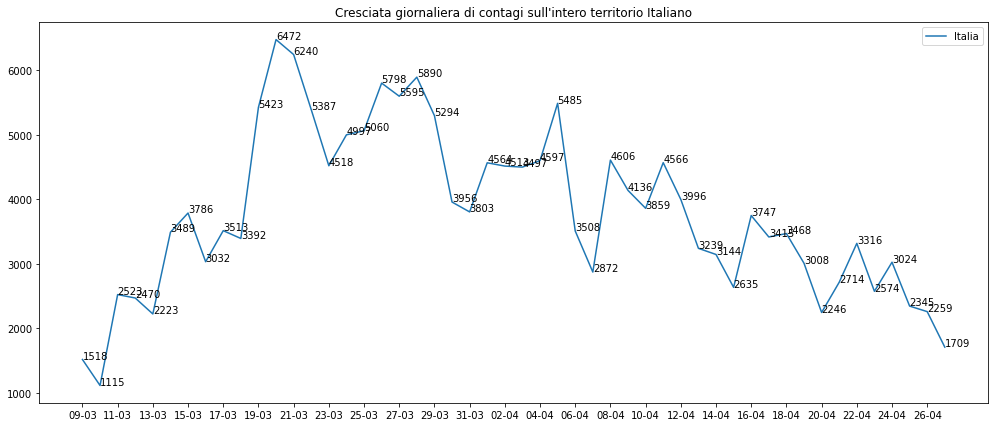

In [57]:
_ = plot_annotate(crescita_italia, 'Cresciata giornaliera di contagi sull\'intero territorio Italiano')

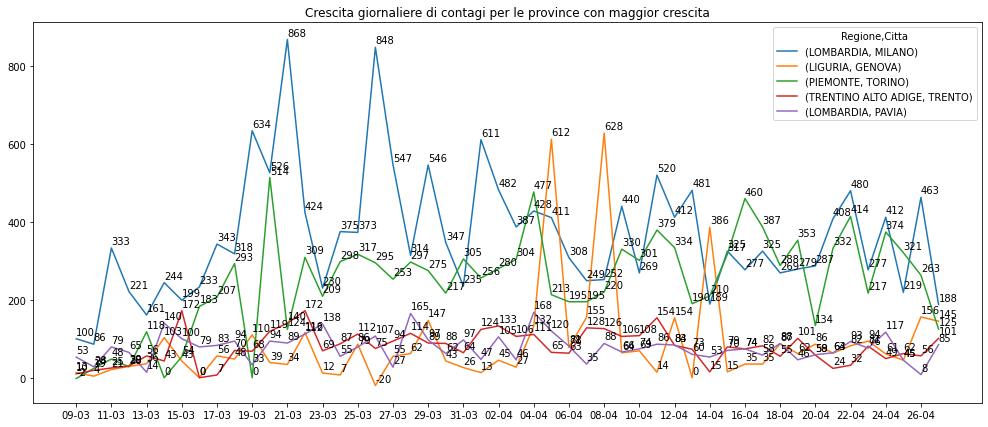

In [58]:
ax = plot_annotate(crescita.sort_values(by=crescita.columns[-1], ascending=False).head(5),
                   'Crescita giornaliere di contagi per le province con maggior crescita')
#_ = ax.set_ylim(-111,ax.get_ylim()[1])

# Average 3 days

In [0]:
avg3 = pd.DataFrame(index=crescita.sort_values(by=crescita.columns[-1], ascending=False).index)
for meno2,ieri, oggi in zip(crescita.columns[:-2], crescita.columns[1:-1], crescita.columns[2:]):
  avg3[oggi] = pd.concat([crescita[oggi], crescita[ieri], crescita[meno2]], axis=1).mean(axis=1)

In [0]:
avg3 = avg3.astype('int32')

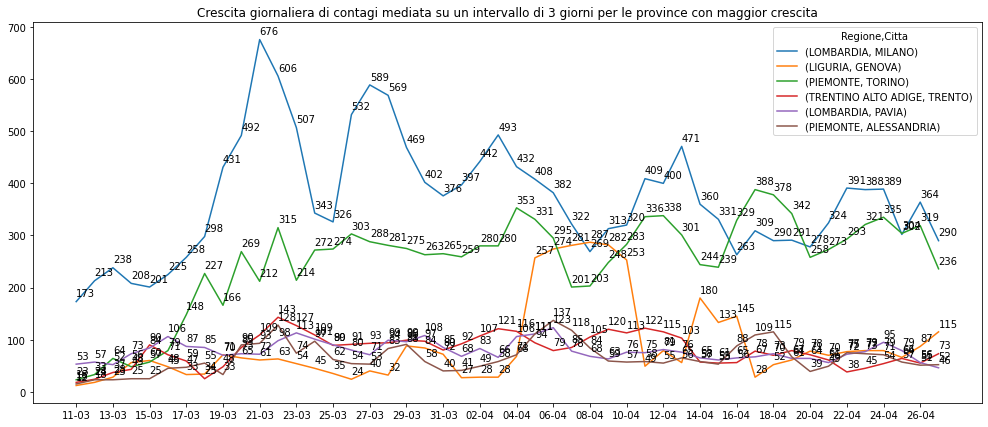

In [61]:
_ = plot_annotate(avg3.head(6), 'Crescita giornaliera di contagi mediata su un intervallo di 3 giorni per le province con maggior crescita')

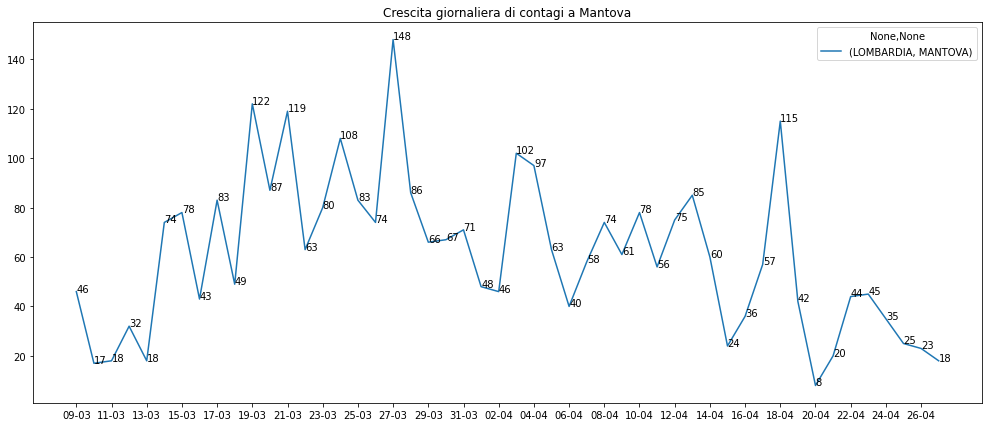

In [62]:
_ = plot_annotate(crescita.loc[('LOMBARDIA','MANTOVA')].to_frame().T, 'Crescita giornaliera di contagi a Mantova', ydelta=0)

In [0]:
regioni = sorted_by_infections.groupby('Regione').sum()
regioni = regioni.sort_values(by=[regioni.columns[-1]],ascending=False)

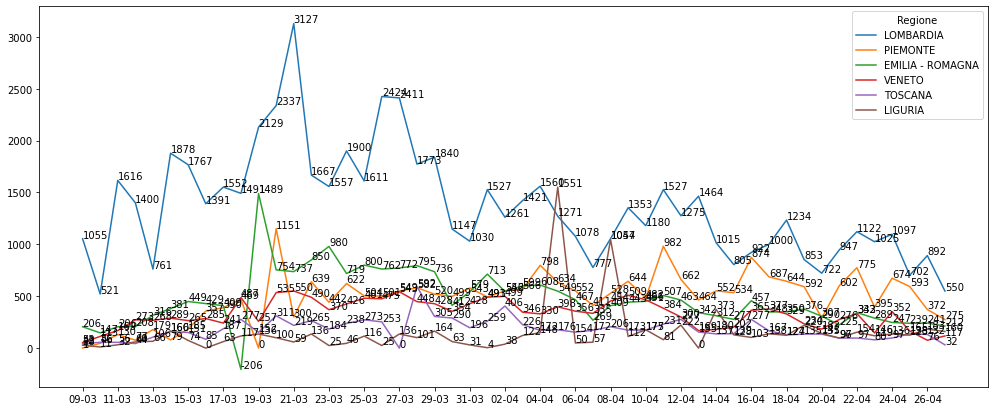

In [64]:
crescita_regioni = crescita.groupby('Regione').sum().loc[regioni.index]
_ = plot_annotate(crescita_regioni.head(6))


In [0]:
casi_italia = sorted_by_infections.sum(axis=0).to_frame().T
casi_italia.index= ['Italia']

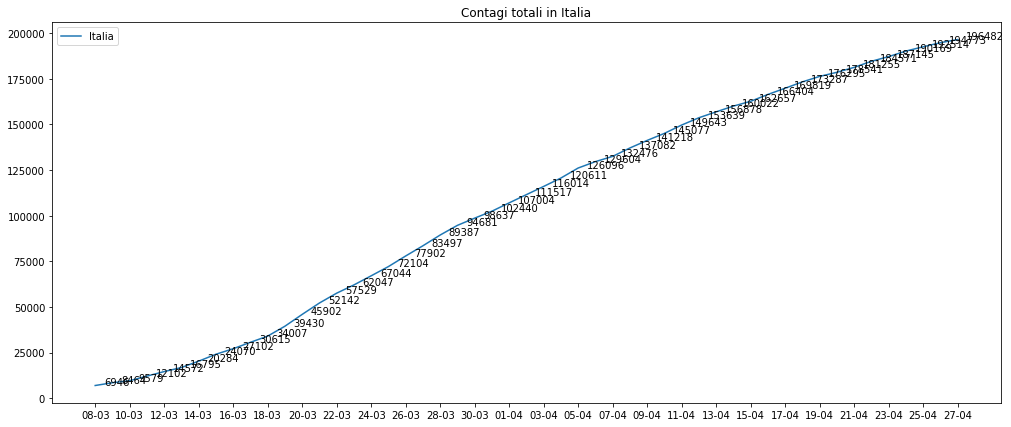

In [66]:
_ = plot_annotate(casi_italia, 'Contagi totali in Italia', xdelta=0.5)

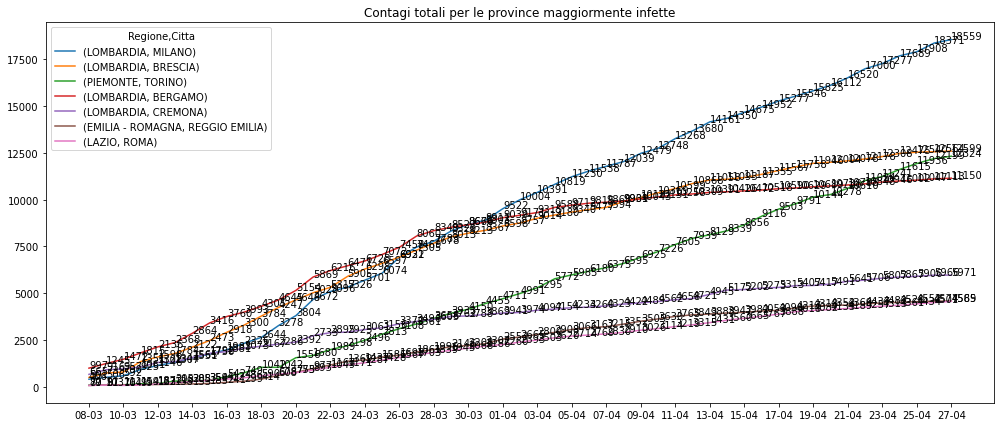

In [67]:
_ = plot_annotate(sorted_by_infections.head(7),'Contagi totali per le province maggiormente infette')

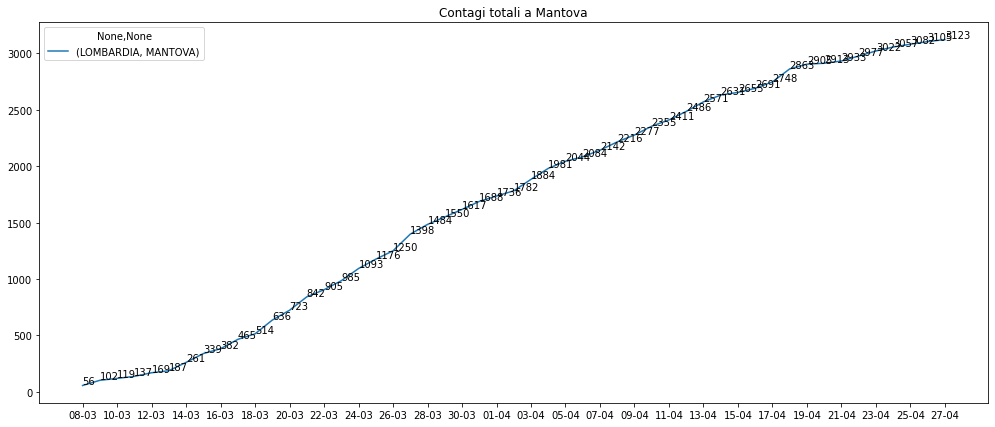

In [68]:
_ = plot_annotate(sorted_by_infections.loc[('LOMBARDIA','MANTOVA')].to_frame().T, 'Contagi totali a Mantova')

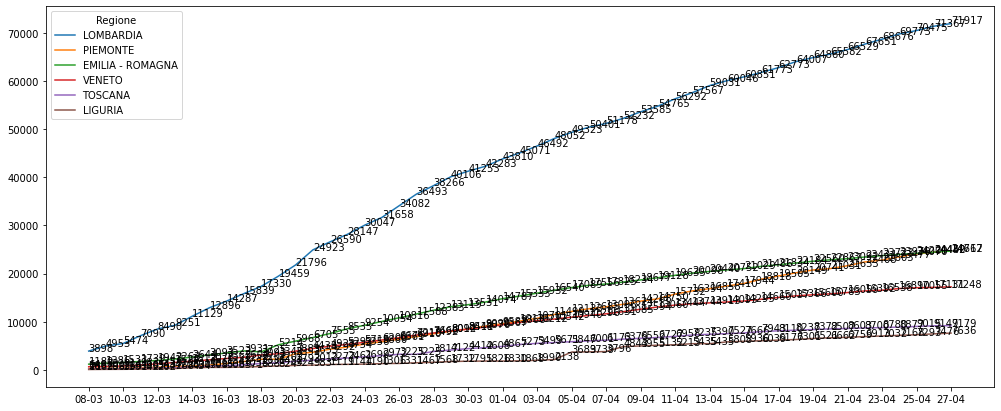

In [69]:
_ = plot_annotate(regioni.head(6))